# Wstęp do Sztucznej Inteligencji - rok akademicki 2020/2021

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Optymalizacja globalna: Prosty algorytm genetyczny - Zadania
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

## Import bibliotek

In [6]:
# Imports: 

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


## Zadanie 1  (obowiązkowe, 1pkt.)
W komórce poniżej wprowdź swój nr albumu a następnie ją wykonaj:

In [ ]:
nr_albumu = 134082
nr_funkcji = (nr_albumu % 16) + 1
print('Twój nr funkcji celu to:', nr_funkcji if nr_funkcji != 6 else 7)

Twój nr funkcji celu to: 3


Zgodnie z wygenerowanym numerem, wybierz funkcję celu ze strony: https://www.sfu.ca/~ssurjano/optimization.html z działu "Many Local Minima".

Zaplementuj ją jako funkcję w Pythonie.

Dla wszystkich funkcji przyjmujemy `N=2` tzn. rozważamy ją jako funkcję dwóch zmiennych $f(x_1, x_2)$.

TWÓJ PROGRAM:

In [7]:
# Objective function: 

def cross_in_tray(XY):
    X, Y = XY
    return -0.0001 * (np.abs(np.sin(X) * np.sin(Y) * np.exp(100 - np.sqrt(X ** 2 + Y ** 2) / np.pi)) + 1) ** 0.1 * -1

## Zadanie 2  (obowiązkowe, 1pkt.)
Przygotuj wykres 3D funkcji zaimplementowanej w zadaniu nr 1.

TWÓJ PROGRAM:

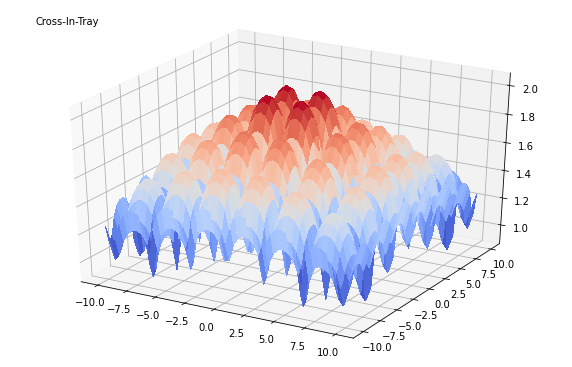

In [8]:
# Objective function plot generator: 

def plot_generator(function, X: np.array, Y: np.array, title = 'Objective function'):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    fig.set_size_inches(10,6.5)
    ax.text2D(0.05, 0.95, title, transform=ax.transAxes)
    X, Y = np.meshgrid(X, Y)
    Z = function([X, Y])
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()

x = np.linspace(-10,10)
y = np.linspace(-10,10)

plot_generator(cross_in_tray, x, y, 'Cross-In-Tray')

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm


def cross_in_tray(XY):
    """
    CROSS-IN-TRAY FUNCTION
    :param X: X domain
    :param Y: Y domain
    :return: Set of values
    """
    X, Y = XY

    return -0.0001 * (np.abs(np.sin(X) * np.sin(Y) * np.exp(100 - np.sqrt(X ** 2 + Y ** 2) / np.pi)) + 1) ** 0.1


def plot(X: np.array, Y: np.array):
    """
    Cross-in-Tray plot drafter
    :param X: X domain
    :param Y: Y domain
    :return: None
    """
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    X, Y = np.meshgrid(X, Y)
    Z = cross_in_tray([X, Y])
    ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.show()





## Zadanie 3 (obowiązkowe, 2pkt.)
Korzystając z funkcji zaimplementowanych na poprzednich zajęciach, zaimplementuj główną pętlę klasycznego algorytmu genetyczengo.
![pag_schemat.png](http://torus.uck.pk.edu.pl/~amarsz/images/pag_schemat.png)

Implementacja powinna mieć postać funkcji, która przyjmuje parametry:

- `fun` - funkcja, której maksimum ma zostać znalezione
- `pop_size` - rozmiar populacji
- `pk` - prawdopodobieństwo krzyżowania
- `pm` - prawdopodobieństwo mutacji
- `generations` - liczba pokoleń 
- `dx` - dokładność kodowania

Funkcja powinna zwracać:
- `best_sol` - najlepsze znalezione rozwiązanie (nieważne, w której iteracji; UWAGA! niekoniecznie jest to najlepszy osobnik z ostatniej populacji)
- `best_generation` - numer pokolenia, z którego pochodzi najlepsze rozwiązanie
- `list_best` - lista z najlepszą oceną osobnika w każdym pokoleniu (najlepsza ocena znaleziona w danym pokoleniu lub wcześniej)
- `list_best_generation` - lista z najlepszymi ocenami w każdym pokoleniu (najlepsza ocena z danej populacji)
- `list_mean` - lista z wartościami średnimi ocen osobników z każdego pokolenia

TWÓJ PROGRAM:

In [9]:
from math import log2

def nbits(a, b, dx):
    n = (b - a) / dx + 1
    B = int(log2(n)) + 1
    dx = (b - a) / ((2 ** B) - 1)
    return B, dx

In [10]:
def decode_individual(individual, N, B, a, dx):
    values = np.split(np.array(individual), N)
    return [ a  + np.sum([value[i] * 2 ** (len(value) - 1 - i) for i in range(0,len(value))])*dx for value in values]

In [11]:
def generate_population(P, N, B):
    return np.random.randint(0,2,(P, N*B))

In [12]:
def evaluate_population(objective_function, population, N, B, a, dx):
    return np.array([objective_function(decode_individual(individual, N, B, a, dx)) for individual in population])


In [13]:
def best_individual(population, evaluated_population):
    index = np.argmax(evaluated_population)
    return {'individual': population[index], 'value': evaluated_population[index]}

### Roulette: 

In [14]:
import random

def roulette(population: np.array, evaluated_population: np.array):
    const = np.max(np.abs(evaluated_population)) + 1
    evaluated_population = evaluated_population + const
    eval_sum = np.sum(evaluated_population)
    eval_range = np.cumsum([eval_individual / eval_sum for eval_individual in evaluated_population])

    random_values = np.random.rand(len(population))
    new_population = []

    for random_value in random_values:
        indexes, *b = np.where(eval_range < random_value)
        survivor = population[len(indexes)]
        new_population.append(survivor)

    return np.array(new_population)

### Cross:

In [16]:
import random

def cross(population, cross_probability):
    new_pop = []
    pop_len = len(population)
    for index in range(0, pop_len):
        if random.uniform(0, 1) < cross_probability:
            locus = random.randint(0, len(population[index]))
            index2 = -len(population) + index + 1
            offspring = np.concatenate((population[index][0:locus], population[index2][locus::]))
            new_pop.append(offspring)
        else:
            offspring = population[index]
            new_pop.append(offspring)
    return np.array(new_pop)



### Mutate

In [17]:
import random

def mutate(pop, pm):
    new_pop = []
    for individual in pop:
        new_individual = []
        for bit in individual:
            if pm < random.uniform(0, 1):
                if bit == 0:
                    new_individual.append(1)
                else:
                    new_individual.append(0)
            else:
                new_individual.append(bit)
        new_pop.append(new_individual)

    new_pop = np.array(new_pop)
    return new_pop

### Genetic Alghorithm


In [18]:
def Genetic_algorithm(objective_function, population_size, N, B, a, code_precision, cross_probability, mutation_probability, generations):
    
    list_best = []
    list_best_generations = []
    list_mean = []
    

    population = generate_population(population_size, N, B)
    evaluated_population = evaluate_population(objective_function, population, N, B, a, dx_new)

    best = best_individual(population, evaluated_population)
    best_generation = 0
    list_best.append(best['value'])
    list_best_generations.append(best['value'])
    list_mean.append(np.sum(evaluated_population)/len(evaluated_population))
    
    first_population = population

    for i in range(0, generations):
          
          population = roulette(population, evaluated_population)
          population = cross(population, cross_probability)
          population = mutate(population, mutation_probability)
          evaluated_population = evaluate_population(objective_function, population, N, B, a, dx_new)

       
          next_best = best_individual(population, evaluated_population)

          if next_best['value'] > best['value']:
             best = next_best
             best_generation = i

          if i == generations/2:
              average_population = population
          
          list_best.append(best['value'])
          list_best_generations.append(next_best['value'])
          list_mean.append(np.sum(evaluated_population)/len(evaluated_population))
    
    last_population = population

    return {  'The best solution': best,
              'The best generation': best_generation,
              'List of the best': list_best,
              'List of the best in all populations': np.array(list_best_generations),
              'Average eval in generation': np.array(list_mean),
              'First population': first_population,
              'Average population': average_population,
              'Last population': last_population
           }

## Zadanie 4 (obowiązkowe, 1pkt.)

Zaprezentuj działanie algorytmu z przykładowymi wartościami parametrów:

- `pop_size`: 60
- `pk`: 0.7
- `pm`: 0.01
- `generations`: 200
- `dx`: 1e-10

Na wykresach funkcji 3D przedstaw położenie osobników z pierwszej populacji, w połowie ewolucji oraz końcowej populacji. Zaznacz wyraźnie położenie najlepszeg rozwiązania.

Na wykresach 2D przedstaw przebieg wartości z list z zebranymi statystykami (listy `list_best`, `list_best_generation`, `list_mean`) w zależności od numeru pokolenia. 

TWÓJ PROGRAM:

Maximum: {'individual': array([1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0]), 'value': 2.059941381701359}


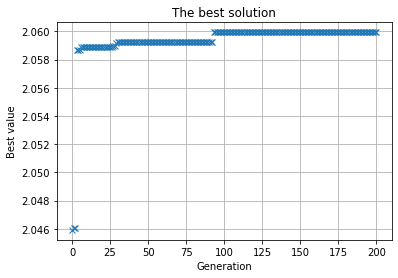

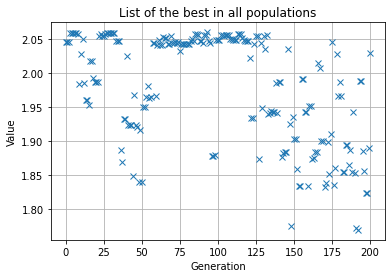

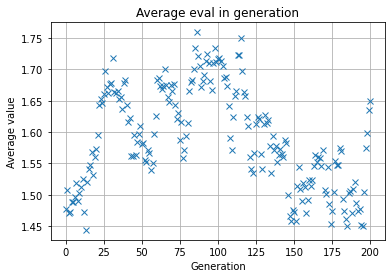

In [19]:

population_size = 60
a = -10
b = 10
dx = 1e-10
N = 2

B, dx_new = nbits(a, b, dx)

cross_probability = 0.7
mutation_probability = 0.01
generations = 200

results = Genetic_algorithm(cross_in_tray, population_size, N, B, a, dx_new, cross_probability, mutation_probability, generations)

# Wyniki: 
best = results['The best solution']
results['The best generation']
list_best = results['List of the best']
list_best_generations = results['List of the best in all populations']
list_mean = results['Average eval in generation']


# Maksimum: 

print('Maximum:',best)
x = np.arange(0, generations + 1)

# Wykresy: 

plt.subplot(1, 1, 1)
plt.plot(x,list_best , 'x', lw=1)

plt.xlabel('Generation')
plt.ylabel('Best value')
plt.title('The best solution')
plt.grid(True)
plt.show()

plt.subplot(1, 1, 1)
plt.plot(x, list_best_generations, 'x', lw=1)
plt.title('List of the best in all populations')
plt.grid(True)
plt.xlabel('Generation')
plt.ylabel('Value')
plt.show()


plt.subplot(1, 1, 1)
plt.plot(x, list_mean, 'x', lw=1)
plt.title('Average eval in generation')
plt.grid(True)
plt.xlabel('Generation')
plt.ylabel('Average value')
plt.show()




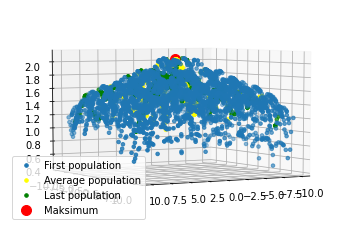

In [40]:

import matplotlib.pyplot as plt

def scatterplot_3d(function, first_population, average_population, last_population, x_max, y_max):
  fig = plt.figure()
  ax  = fig.add_subplot(projection='3d')



  X = [value[0] for value in first_population]
  Y = [value[1] for value in first_population]


  X, Y = np.meshgrid(X, Y)
  Z = function([X, Y])
  ax.scatter(X, Y, Z, marker='.', s = 50, label='First population')



  X = [value[0] for value in average_population]
  Y = [value[1] for value in average_population]


  X, Y = np.meshgrid(X, Y)
  Z = function([X, Y])
  ax.scatter(X, Y, Z, marker='.', s = 50, label='Average population', color='yellow')


  X = [value[0] for value in last_population]
  Y = [value[1] for value in last_population]


  X, Y = np.meshgrid(X, Y)
  Z = function([X, Y])
  ax.scatter(X, Y, Z, marker='.', s = 50, label='Last population', color = 'green')

  ax.scatter(x_max, y_max, function([x_max, y_max]), marker='o', s = 100, color='r', label='Maksimum')

  ax.legend()
  ax.view_init(5, 60)
  plt.show()


first_population = results['First population']
average_population = results['Average population']
last_population = results['Last population']


first_population = [decode_individual(individual, N, B, a, dx_new) for individual in first_population]
average_population = [decode_individual(individual, N, B, a, dx_new) for individual in average_population]
last_population = [decode_individual(individual, N, B, a, dx_new) for individual in last_population]

x_max, y_max = decode_individual(best['individual'], N, B, a, dx_new)
scatterplot_3d(cross_in_tray, first_population, average_population, last_population, x_max, y_max)



## Zadanie 5 (obowiązkowe, 5pkt.)

Zbadaj wpływ parametrów klasycznego algorytmu genetycznego na jego zdolność znalezienia optymalnego rozwiązania. Dla ułatwienia analizy, zmieniając jeden parametr, zachowaj typowe wartości pozostałych.

1. Jak działa algorytm z typowymi ustawieniami parametrów (jak w zadaniu 4)? Podaj średnią wartość przystosowania znalezionego rozwiązania po wielokrotnym uruchomieniu AG.
2. Czy wydłużenie ewolucji przynosi poprawę czy też następuje "nasycenie"? Porównaj zarówno jak dobre rozwiązanie zostało znalezione jak również w której generacji.
    - `generations`: kilka różnych wartości z przedziału [100, 10000]
3. Czy mutacja jest potrzebna? 
    - `pm` = 0.0
4. Jak działa algorytm bez krzyżowania, z samą mutacją? 
    - `pk` = 0.0
5. Czy lepiej jest dłużej ewoluować mniejszą populację czy krócej większą, jeśli liczba ewaluacji funkcji jest taka sama (np. 2000)?
    - porównaj dwa ustawienia: `pop_size`=20, `generations`=100  vs. `pop_size`=100, `generations`=20.

UWAGA: Powyższe porównania powinny być wykonane na podstawie uśrednionych wyników co najmniej 10 uruchomień algorytmu z danymi parametrami. Podając wyniki podaj średnią z najlepszych znalezionych rozwiązań oraz odchylenie standardowe oraz numer pokolenia, w którym znaleziono rozwiązanie.

TWÓJ PROGRAM:

In [71]:
# Średnia: 
def mean(data_points_list):
  return np.sum(np.array(data_points_list))/len(data_points_list)

# Odchylenie standardowe:
def standard_deviation(mean, data_points_list):
    return np.sqrt(np.sum((np.array(data_points_list)-mean)**2))

In [91]:
# Test nr.1

values_test_1_1 = []

for i in range(exec_num):
    results = Genetic_algorithm(cross_in_tray, population_size, N, B, a, dx_new, cross_probability, mutation_probability, generations )
    values_test_1_1.append(results['The best solution']['value'])

In [93]:
# Test nr.1

print('Średnia = ', mean(values_test_1_1))
print('Odchylenie standardowe', standard_deviation(mean(values_test_1_1), values_test_1_1))

Średnia =  2.0620449243094003
Odchylenie standardowe 0.001639026777823868


In [94]:
# Test nr.2 
values_test_2_1 = []
values_test_2_2 = []
values_test_2_3 = []

for i in range(exec_num):
    results = Genetic_algorithm(cross_in_tray, population_size, N, B, a, dx_new, cross_probability, mutation_probability, 1000 )
    values_test_2_1.append(results['The best solution']['value'])

    results = Genetic_algorithm(cross_in_tray, population_size, N, B, a, dx_new, cross_probability, mutation_probability, 500)
    values_test_2_2.append(results['The best solution']['value'])
  
    results = Genetic_algorithm(cross_in_tray, population_size, N, B, a, dx_new, cross_probability, mutation_probability, 100)
    values_test_2_3.append(results['The best solution']['value'])


In [95]:
# Test nr. 3 results: 
print('generations = 100')
print('Średnia = ', mean(values_test_2_1))
print('Odchylenie standardowe', standard_deviation(mean(values_test_2_1), values_test_2_1))

print('generations = 2500')
print('Średnia = ', mean(values_test_2_2))
print('Odchylenie standardowe', standard_deviation(mean(values_test_2_2), values_test_2_2))

print('generations = 10000')
print('Średnia = ', mean(values_test_2_3))
print('Odchylenie standardowe', standard_deviation(mean(values_test_2_3), values_test_2_3))

# Wnoski:
# Wydłużenie ewolucji nie przynosi poprawy.

generations = 100
Średnia =  2.062465198787998
Odchylenie standardowe 0.0005837519019255947
generations = 2500
Średnia =  2.0623788650642205
Odchylenie standardowe 0.001102276305444801
generations = 10000
Średnia =  2.0602687244154465
Odchylenie standardowe 0.008523144009319516


In [84]:
# Test nr.3

values_test_3_1 = []
values_test_3_2 = []


for i in range(exec_num):
    results = Genetic_algorithm(cross_in_tray, population_size, N, B, a, dx_new, cross_probability, 0.0, generations)
    values_test_3_1.append(results['The best solution']['value'])
    
    results = Genetic_algorithm(cross_in_tray, population_size, N, B, a, dx_new, cross_probability, mutation_probability, generations)
    values_test_3_2.append(results['The best solution']['value'])

In [85]:
# Test nr. 3 results: 

print('pm = 0.0')
print('Średnia = ', mean(values_test_3_1))
print('Odchylenie standardowe', standard_deviation(mean(values_test_3_1), values_test_3_1))

print('pm = 0.01')
print('Średnia = ', mean(values_test_3_2))
print('Odchylenie standardowe', standard_deviation(mean(values_test_3_2), values_test_3_2))

# Wnioski: 
# Wynik bliższy rzeczywistemu otrzymamy gdy pm = 0.01 


pm = 0.0
Średnia =  2.0503530087698456
Odchylenie standardowe 0.04418126912147405
pm = 0.01
Średnia =  2.0612469670432416
Odchylenie standardowe 0.0052971937615189195


In [81]:
# Test nr.4 

values_test_4_1 = []
values_test_4_2 = []


for i in range(exec_num):
  results = Genetic_algorithm(cross_in_tray, population_size, N, B, a, dx_new, 0.0, mutation_probability, generations)
  values_test_4_1.append(results['The best solution']['value'])
  
  results = Genetic_algorithm(cross_in_tray, population_size, N, B, a, dx_new, cross_probability, mutation_probability, generations)
  values_test_4_2.append(results['The best solution']['value'])


In [82]:
# Test nr. 4 results: 

print('pk = 0.0')
print('Średnia = ', mean(values_test_4_1))
print('Odchylenie standardowe', standard_deviation(mean(values_test_4_1), values_test_4_1))

print('pk = 0.7')
print('Średnia = ', mean(values_test_4_2))
print('Odchylenie standardowe', standard_deviation(mean(values_test_4_2), values_test_4_2))

# Wnioski:
# Różnica w wynikach gdy pk = 0.0 i gdy pk = 0.7 jest bardzo niewielka.

pk = 0.0
Średnia =  2.0611794594659627
Odchylenie standardowe 0.003864553961582825
pk = 0.7
Średnia =  2.061573117228323
Odchylenie standardowe 0.0034385881317376367


In [70]:
# Test nr.5 

values_test_5_1 = []
values_test_5_2 = []


for i in range(exec_num):
  results = Genetic_algorithm(cross_in_tray, 20, N, B, a, dx_new, cross_probability, mutation_probability, 100)
  values_test_5_1.append(results['The best solution']['value'])
  
  results = Genetic_algorithm(cross_in_tray, 100, N, B, a, dx_new, cross_probability, mutation_probability, 20)
  values_test_5_2.append(results['The best solution']['value'])


In [74]:
# Test nr. 5 results: 

print('population = 20, generations = 100')
print('Średnia = ', mean(values_test_5_1))
print('Odchylenie standardowe', standard_deviation(mean(values_test_5_1), values_test_5_1))

print('population = 100, generations = 20')
print('Średnia = ', mean(values_test_5_2))
print('Odchylenie standardowe', standard_deviation(mean(values_test_5_2), values_test_5_2))


# Wnioski: 
# Wyniki jednoznacznie wskazują, że lepiej jest zastosować rozwiązanie: population = 100, generations = 20 

population = 20, generations = 100
Średnia =  2.049390810531322
Odchylenie standardowe 0.04118271119971551
population = 100, generations = 20
Średnia =  2.0568670157439946
Odchylenie standardowe 0.014266697150675595


UMIEŚĆ TWOJE WNIOSKI I KOMENTARZE W KOMÓRCE PONIŻEJ

Odnieś się do każdego punktu.

&copy; Katedra Informatyki, Politechnika Krakowska